# Our objective for this project is to find the Revolving credict which is our business problem


#Required packaged to perform EDA

In [1]:
import pandas as pd # to read our data set
import numpy as np # to perform numeric operation
import matplotlib.pyplot as plt # for Visuvalise
import seaborn as sns #Visuvalise
import statistics 

#to read our data set

In [2]:
df=pd.read_csv("C:\\Users\\sivak\\Desktop\\project\\data.csv", encoding='latin1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)# to sea top 5 observation in our data set

,member_id,loan_amnt,terms,batch_ID,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,58189336,14350,36 months,,19.19,E,E3,clerk,9 years,OWN,...,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0
1,70011223,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0
2,70255675,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0
3,1893936,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0
4,7652106,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0


In [4]:
df. shape# to find no of rows & columns

(887379, 36)

# removing some unwanded columns in our data sets 



#1.	member_id unique ID assigned to each member
#4.    batch_ID batch numbers allotted to members
#6.    Grade:grade assigned by the bank
#7.    sub_grade: grade assigned by the bank
#8.    emp_designation job / Employer title of member
#10. home_ownership status of home ownership
#12. verification_status status of income verified by the bank
#13. purpose purpose of loan
#14. State: living state of member
#21. pub_rec number of derogatory public records
#24. members credit line
#25. list_status unique listing status of the loan - W(Waiting),F(Forwarded)
#32. application_type indicates when the member is an individual or joint
#33. verification_status_joint indicates if the joint members income was verified by the bank
#18. Application type


In [5]:
df.drop(df.columns[[0,3,5,6,7,8,9,11,12,13,20,23,31,32]],axis=1, inplace=True)

In [6]:
df.drop(df.columns[[18]],axis=1, inplace=True)

In [7]:
df.shape

(887379, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    887379 non-null  int64  
 1   terms                        887379 non-null  object 
 2   Rate_of_intrst               887379 non-null  float64
 3   annual_inc                   887375 non-null  float64
 4   debt_income_ratio            887379 non-null  float64
 5   delinq_2yrs                  887350 non-null  float64
 6   inq_last_6mths               887350 non-null  float64
 7   mths_since_last_delinq       433067 non-null  float64
 8   mths_since_last_record       137053 non-null  float64
 9   numb_credit                  887350 non-null  float64
 10  total revol_bal              887379 non-null  float64
 11  total_credits                887350 non-null  float64
 12  total_rec_int                887379 non-null  float64
 13 

In [9]:
df.shape

(887379, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    887379 non-null  int64  
 1   terms                        887379 non-null  object 
 2   Rate_of_intrst               887379 non-null  float64
 3   annual_inc                   887375 non-null  float64
 4   debt_income_ratio            887379 non-null  float64
 5   delinq_2yrs                  887350 non-null  float64
 6   inq_last_6mths               887350 non-null  float64
 7   mths_since_last_delinq       433067 non-null  float64
 8   mths_since_last_record       137053 non-null  float64
 9   numb_credit                  887350 non-null  float64
 10  total revol_bal              887379 non-null  float64
 11  total_credits                887350 non-null  float64
 12  total_rec_int                887379 non-null  float64
 13 

# converting the data types
#loan_amnt- float

In [10]:
df['loan_amnt '] = df['loan_amnt '].astype(float)

In [11]:
def remove_months(string):
  return int(string.strip(' months'))
df['terms'] = df['terms'].apply(remove_months)

In [12]:
df.terms

0         36
1         36
2         36
3         36
4         36
          ..
887374    36
887375    60
887376    60
887377    36
887378    60
Name: terms, Length: 887379, dtype: int64

In [13]:
df['terms'] = df['terms'].astype(float)

In [15]:
#df['Experience'] = df['Experience'].astype(str).str.lstrip('<').str.rstrip('+ years')

In [16]:
#df.Experience

0          9
1          1
2          2
3         10
4         10
          ..
887374     1
887375     1
887376    10
887377     1
887378     2
Name: Experience, Length: 887379, dtype: object

In [17]:
df.head(200)

,loan_amnt,terms,Rate_of_intrst,Experience,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,total revol_bal,total_credits,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350.0,36.0,19.19,9,28700.0,33.88,0.0,1.0,50.0,75.0,...,22515.0,28.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0
1,4800.0,36.0,10.99,1,65000.0,3.64,0.0,1.0,NaN,NaN,...,7624.0,13.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9974.0
2,10000.0,36.0,7.26,2,45000.0,18.42,0.0,0.0,NaN,NaN,...,10877.0,19.0,0.0,0.0,0.0,0.0,NaN,0.0,65.0,38295.0
3,15000.0,36.0,19.72,10,105000.0,14.97,0.0,2.0,46.0,NaN,...,13712.0,21.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,55564.0
4,16000.0,36.0,10.64,10,52000.0,20.16,0.0,0.0,NaN,NaN,...,35835.0,27.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,16800.0,60.0,12.12,5,38000.0,14.78,0.0,0.0,NaN,NaN,...,20295.0,12.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN
196,17000.0,60.0,22.15,10,49000.0,24.79,0.0,1.0,81.0,NaN,...,13582.0,38.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,187785.0
197,18000.0,36.0,7.90,10,150000.0,7.86,0.0,1.0,81.0,49.0,...,4593.0,43.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN
198,28000.0,36.0,8.39,2,115000.0,11.29,0.0,0.0,49.0,NaN,...,12582.0,29.0,0.0,0.0,0.0,0.0,NaN,0.0,1687.0,45602.0


In [18]:
#df['Experience'] = df['Experience'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    887379 non-null  float64
 1   terms                        887379 non-null  float64
 2   Rate_of_intrst               887379 non-null  float64
 3   annual_inc                   887375 non-null  float64
 4   debt_income_ratio            887379 non-null  float64
 5   delinq_2yrs                  887350 non-null  float64
 6   inq_last_6mths               887350 non-null  float64
 7   mths_since_last_delinq       433067 non-null  float64
 8   mths_since_last_record       137053 non-null  float64
 9   numb_credit                  887350 non-null  float64
 10  total revol_bal              887379 non-null  float64
 11  total_credits                887350 non-null  float64
 12  total_rec_int                887379 non-null  float64
 13 

In [15]:
df.isnull().sum()

loan_amnt                           0
terms                               0
Rate_of_intrst                      0
annual_inc                          4
debt_income_ratio                   0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
numb_credit                        29
total revol_bal                     0
total_credits                      29
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med        145
mths_since_last_major_derog    665676
acc_now_delinq                     29
tot_colle_amt                   70276
tot_curr_bal                    70276
dtype: int64

# Filling null values with mean

In [20]:
#df.Experience=df.Experience.fillna(df.Experience.mean())

In [18]:
df.annual_inc =df.annual_inc.fillna(df.annual_inc.mean())
df.delinq_2yrs  =df.delinq_2yrs.fillna(df.delinq_2yrs.mean())
df.inq_last_6mths  =df.inq_last_6mths.fillna(df.inq_last_6mths.mean())
df.mths_since_last_delinq =df.mths_since_last_delinq.fillna(df.mths_since_last_delinq.mean())
df.mths_since_last_record =df.mths_since_last_record.fillna(df.mths_since_last_record.mean())
df.numb_credit  =df.numb_credit.fillna(df.numb_credit.mean())
df.total_credits   =df.total_credits.fillna(df.total_credits.mean())
df.collections_12_mths_ex_med     =df.collections_12_mths_ex_med.fillna(df.collections_12_mths_ex_med.mean())
df.mths_since_last_major_derog     =df.mths_since_last_major_derog.fillna(df.mths_since_last_major_derog.mean())
df.tot_colle_amt      =df.tot_colle_amt.fillna(df.tot_colle_amt.mean())
df.tot_curr_bal      =df.tot_curr_bal.fillna(df.tot_curr_bal.mean())
df.acc_now_delinq       =df.acc_now_delinq .fillna(df.acc_now_delinq .mean())






In [19]:
df.isnull().sum()

loan_amnt                      0
terms                          0
Rate_of_intrst                 0
annual_inc                     0
debt_income_ratio              0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
numb_credit                    0
total revol_bal                0
total_credits                  0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_colle_amt                  0
tot_curr_bal                   0
dtype: int64

In [21]:
df. describe()

,loan_amnt,terms,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,...,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.00000,887379.000000,887379.000000,8.873790e+05,8.873790e+05
mean,14755.264605,43.201090,13.246740,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,...,25.268026,1754.804327,0.396692,45.919243,4.880757,0.01438,44.104838,0.004991,2.257026e+02,1.394582e+05
std,8435.455601,10.998663,4.381867,6.469815e+04,17.190626,0.862230,0.998431,15.288613,11.054163,5.317226,...,11.840368,2095.356099,4.087825,409.693874,63.125281,0.13418,11.086358,0.077624,9.894641e+03,1.475363e+05
min,500.000000,36.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,36.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,32.000000,70.117903,8.000000,...,17.000000,441.460000,0.000000,0.000000,0.000000,0.00000,44.104838,0.000000,0.000000e+00,3.224600e+04
50%,13000.000000,36.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,34.063798,70.117903,11.000000,...,24.000000,1073.280000,0.000000,0.000000,0.000000,0.00000,44.104838,0.000000,0.000000e+00,1.000890e+05
75%,20000.000000,60.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,34.063798,70.117903,14.000000,...,32.000000,2238.265000,0.000000,0.000000,0.000000,0.00000,44.104838,0.000000,0.000000e+00,1.957940e+05
max,35000.000000,60.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,...,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.00000,188.000000,14.000000,9.152545e+06,8.000078e+06


In [22]:
df[df.columns[0:]].corr()['total revol_bal'][:]

loan_amnt                      0.333580
terms                          0.091102
Rate_of_intrst                -0.035708
annual_inc                     0.295783
debt_income_ratio              0.067277
delinq_2yrs                   -0.032486
inq_last_6mths                -0.017556
mths_since_last_delinq        -0.017470
mths_since_last_record        -0.007371
numb_credit                    0.224540
total revol_bal                1.000000
total_credits                  0.189103
total_rec_int                  0.137380
total_rec_late_fee             0.002774
recoveries                     0.010828
collection_recovery_fee        0.008151
collections_12_mths_ex_med    -0.022850
mths_since_last_major_derog   -0.007934
acc_now_delinq                -0.000855
tot_colle_amt                 -0.006036
tot_curr_bal                   0.429024
Name: total revol_bal, dtype: float64

All the independent parameters are not strongly co related with dependent variable

In [23]:
correlation_df = df.corr()

print(correlation_df)

                             loan_amnt      terms  Rate_of_intrst  annual_inc  \
loan_amnt                      1.000000  0.411717        0.145023    0.332697   
terms                          0.411717  1.000000        0.428058    0.058360   
Rate_of_intrst                 0.145023  0.428058        1.000000   -0.072785   
annual_inc                     0.332697  0.058360       -0.072785    1.000000   
debt_income_ratio              0.020675  0.051077        0.079903   -0.087409   
delinq_2yrs                   -0.000159 -0.000503        0.055177    0.047469   
inq_last_6mths                -0.034167 -0.004614        0.227647    0.035193   
mths_since_last_delinq        -0.026403 -0.005105       -0.020551   -0.036604   
mths_since_last_record        -0.003691  0.013464        0.008254   -0.033181   
numb_credit                    0.198900  0.086125       -0.010381    0.138390   
total revol_bal                0.333580  0.091102       -0.035708    0.295783   
total_credits               

# to find skewness

In [24]:
df.skew(axis = 0)

loan_amnt                        0.681683
terms                            0.872637
Rate_of_intrst                   0.429481
annual_inc                      44.478587
debt_income_ratio              441.486775
delinq_2yrs                      5.473885
inq_last_6mths                   2.108445
mths_since_last_delinq           0.652054
mths_since_last_record          -0.505260
numb_credit                      1.249401
total revol_bal                 15.949302
total_credits                    0.892554
total_rec_int                    2.826100
total_rec_late_fee              17.404085
recoveries                      18.061839
collection_recovery_fee         29.655693
collections_12_mths_ex_med      17.411823
mths_since_last_major_derog      0.530030
acc_now_delinq                  24.066750
tot_colle_amt                  892.239534
tot_curr_bal                     3.041076
dtype: float64

In [ ]:
#corelation heatmap

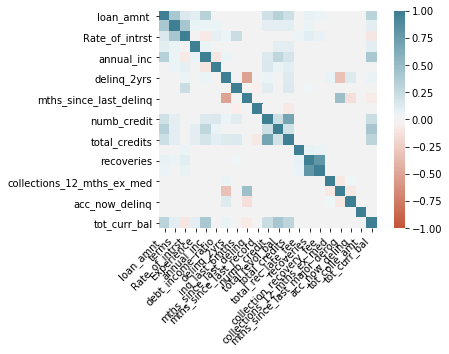

In [25]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

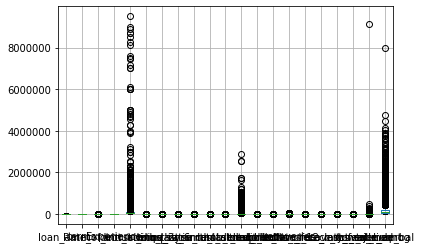

In [20]:
df.boxplot()

In [26]:
revcred_correlation = df.corr()
revcred_correlation

,loan_amnt,terms,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,...,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
loan_amnt,1.000000,0.411717,0.145023,0.332697,0.020675,-0.000159,-0.034167,-0.026403,-0.003691,0.198900,...,0.222633,0.533916,0.031395,0.073150,0.052205,-0.016648,-0.017894,0.003947,-0.004108,0.315930
terms,0.411717,1.000000,0.428058,0.058360,0.051077,-0.000503,-0.004614,-0.005105,0.013464,0.086125,...,0.102081,0.382550,0.004754,0.057290,0.035883,-0.005362,-0.002593,0.004944,-0.002260,0.106477
Rate_of_intrst,0.145023,0.428058,1.000000,-0.072785,0.079903,0.055177,0.227647,-0.020551,0.008254,-0.010381,...,-0.038618,0.445679,0.057150,0.106840,0.070867,0.013335,-0.005417,0.026478,0.001090,-0.088222
annual_inc,0.332697,0.058360,-0.072785,1.000000,-0.087409,0.047469,0.035193,-0.036604,-0.033181,0.138390,...,0.187332,0.128535,0.013500,0.007717,0.006630,-0.003936,-0.017908,0.014775,0.001062,0.405282
debt_income_ratio,0.020675,0.051077,0.079903,-0.087409,1.000000,-0.002831,-0.008106,0.001022,0.012621,0.144249,...,0.108055,0.008380,-0.005748,0.001162,0.002159,-0.000292,0.005131,0.003205,-0.002066,-0.007218
delinq_2yrs,-0.000159,-0.000503,0.055177,0.047469,-0.002831,1.000000,0.021375,-0.515011,-0.034771,0.051189,...,0.122713,0.001665,0.017423,-0.000729,0.000989,0.063006,-0.324279,0.130326,0.000204,0.063706
inq_last_6mths,-0.034167,-0.004614,0.227647,0.035193,-0.008106,0.021375,1.000000,0.010575,-0.039353,0.111235,...,0.135584,0.085584,0.031620,0.045586,0.033992,0.006843,0.010739,-0.005329,0.002921,0.031633
mths_since_last_delinq,-0.026403,-0.005105,-0.020551,-0.036604,0.001022,-0.515011,0.010575,1.000000,-0.009031,-0.029978,...,-0.030761,-0.019749,-0.016299,-0.003123,-0.003635,-0.030586,0.472508,-0.138662,0.006195,-0.066270
mths_since_last_record,-0.003691,0.013464,0.008254,-0.033181,0.012621,-0.034771,-0.039353,-0.009031,1.000000,0.004601,...,-0.070390,0.025532,-0.008045,0.003960,0.000920,-0.010056,-0.015152,-0.006781,-0.006125,-0.008994
numb_credit,0.198900,0.086125,-0.010381,0.138390,0.144249,0.051189,0.111235,-0.029978,0.004601,1.000000,...,0.695075,0.061222,-0.009601,0.001560,0.003215,0.009609,0.004390,0.017752,0.000120,0.235886


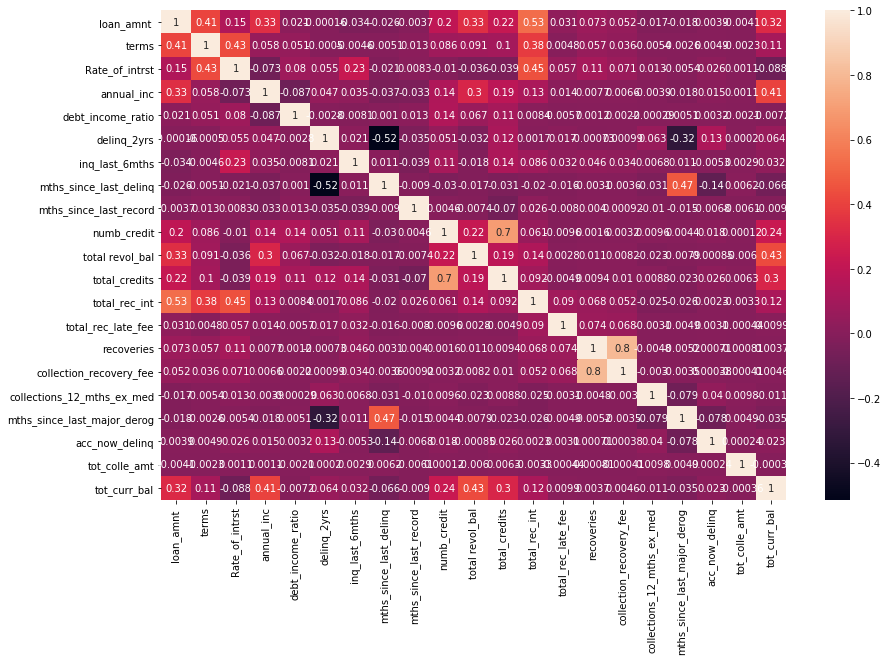

In [27]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(revcred_correlation, 
            xticklabels=revcred_correlation.columns.values,
            yticklabels=revcred_correlation.columns.values,annot= True)
plt.show()

#Univarient analysis

In [28]:
def univariate(df,col,vartype,hue =None):
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

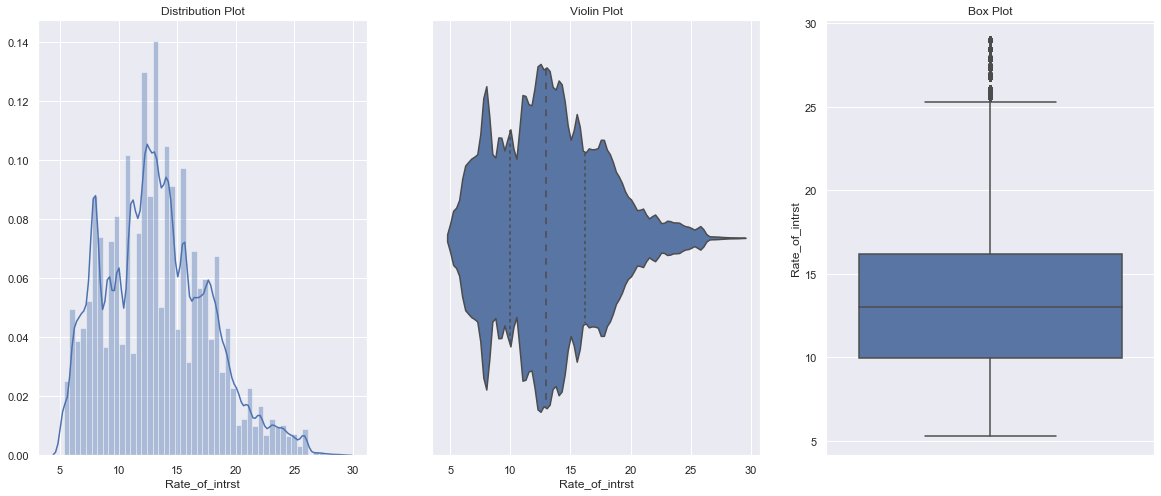

In [29]:
univariate(df=df,col='Rate_of_intrst',vartype=0)

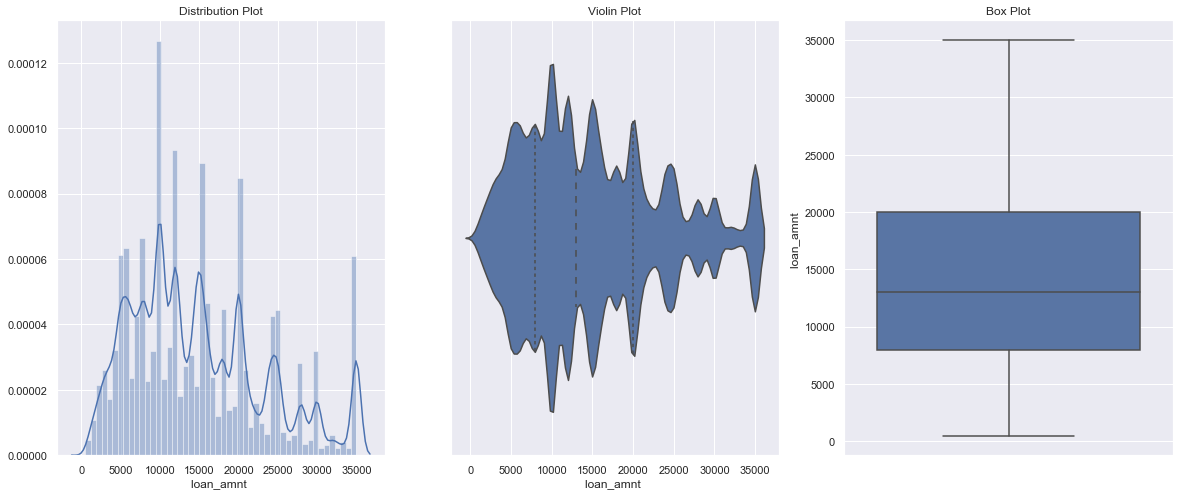

In [30]:
univariate(df=df,col='loan_amnt ',vartype=0)

In [34]:
df.columns

Index(['loan_amnt ', 'terms', 'Rate_of_intrst', 'Experience', 'annual_inc',
       'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'numb_credit',
       'total revol_bal', 'total_credits', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_colle_amt',
       'tot_curr_bal'],
      dtype='object')

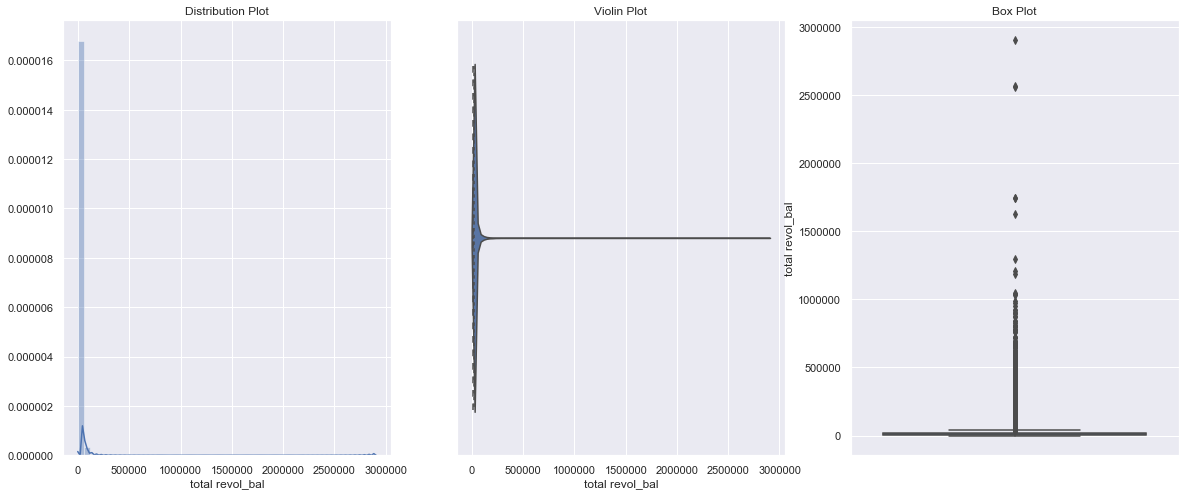

In [37]:
univariate(df=df,col='total revol_bal',vartype=0)

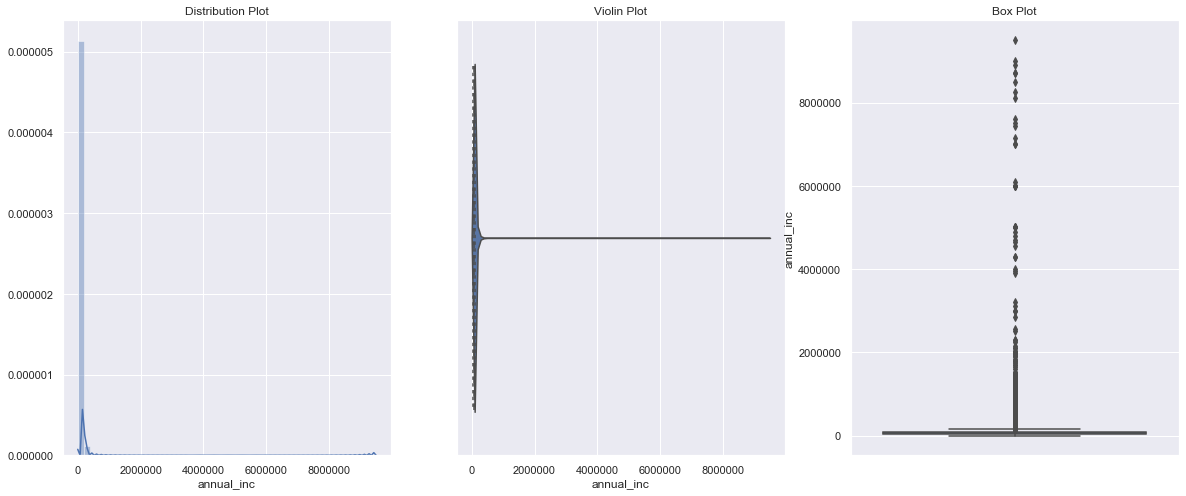

In [53]:
univariate(df=df,col='annual_inc',vartype=0)

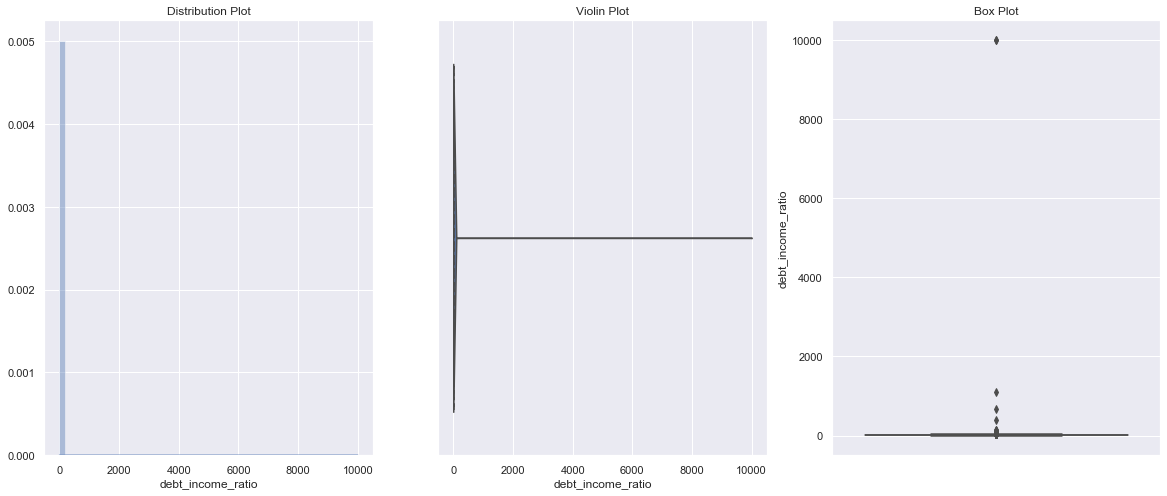

In [55]:
univariate(df=df,col='debt_income_ratio',vartype=0)

# Applying Multilinear Regression model

In [31]:
import statsmodels.formula.api as snf

In [33]:
#Scaling the data
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [34]:
df_norm=norm_func(df)

In [35]:
df_norm

,loan_amnt,terms,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,...,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,0.401449,0.0,0.585974,0.003021,0.003388,0.000000,0.030303,0.265957,0.581395,0.155556,...,0.160714,0.048495,0.0,0.0,0.0,0.0,0.393617,0.0,0.000000,0.003587
1,0.124638,0.0,0.239544,0.006842,0.000364,0.000000,0.030303,0.181190,0.543550,0.066667,...,0.071429,0.003468,0.0,0.0,0.0,0.0,0.234600,0.0,0.000000,0.001247
2,0.275362,0.0,0.081960,0.004737,0.001842,0.000000,0.000000,0.181190,0.543550,0.055556,...,0.107143,0.002333,0.0,0.0,0.0,0.0,0.234600,0.0,0.000007,0.004787
3,0.420290,0.0,0.608365,0.011053,0.001497,0.000000,0.060606,0.244681,0.543550,0.111111,...,0.119048,0.200723,0.0,0.0,0.0,0.0,0.234600,0.0,0.000000,0.006945
4,0.449275,0.0,0.224757,0.005474,0.002016,0.000000,0.000000,0.181190,0.543550,0.122222,...,0.154762,0.094871,0.0,0.0,0.0,0.0,0.234600,0.0,0.000000,0.005895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,0.420290,0.0,0.049430,0.010237,0.001246,0.000000,0.000000,0.409574,0.543550,0.133333,...,0.136905,0.048762,0.0,0.0,0.0,0.0,0.409574,0.0,0.000000,0.017990
887375,1.000000,1.0,0.869033,0.018947,0.001178,0.051282,0.060606,0.101064,0.543550,0.233333,...,0.190476,0.268880,0.0,0.0,0.0,0.0,0.234600,0.0,0.000000,0.096588
887376,0.391304,1.0,0.514998,0.005895,0.001644,0.000000,0.090909,0.287234,0.798450,0.122222,...,0.142857,0.142787,0.0,0.0,0.0,0.0,0.234600,0.0,0.000025,0.017432
887377,0.565217,0.0,0.081960,0.010526,0.001500,0.000000,0.000000,0.181190,0.543550,0.077778,...,0.059524,0.031680,0.0,0.0,0.0,0.0,0.234600,0.0,0.000000,0.036499


In [36]:
df_norm_new=df_norm.rename(columns={'total revol_bal':'revolbalance', 'mths_since_last_major_derog':'majorderogmonths'})


In [37]:
df_norm_new3=df_norm.rename(columns={'loan_amnt ':'loanamnt','Rate_of_intrst':'interest','mths_since_last_major_derog':'lasrmaj_derog', 'collections_12_mths_ex_med':'collections', 'mths_since_last_record':'lastrecord', 'collection_recovery_fee':'collectionfee', 'total_rec_late_fee':'latefee', 'total revol_bal':'revolbal', 'acc_now_delinq':'nowdelinq','inq_last_6mths':'inq6mont',  'debt_income_ratio':'debtincratio', 'mths_since_last_delinq':'lastdeling', 'tot_colle_amt':'collecamnt', 'tot_curr_bal':'currentbal'})

In [38]:
df_norm_new3.columns

Index(['loanamnt', 'terms', 'interest', 'annual_inc', 'debtincratio',
       'delinq_2yrs', 'inq6mont', 'lastdeling', 'lastrecord', 'numb_credit',
       'revolbal', 'total_credits', 'total_rec_int', 'latefee', 'recoveries',
       'collectionfee', 'collections', 'lasrmaj_derog', 'nowdelinq',
       'collecamnt', 'currentbal'],
      dtype='object')

In [40]:
m1=snf.ols('revolbal~loanamnt+terms+interest+annual_inc+debtincratio+delinq_2yrs+inq6mont+lastdeling+lastrecord+numb_credit+total_credits+latefee+recoveries+collectionfee+collections+lasrmaj_derog+nowdelinq+collecamnt+currentbal',data=df_norm_new3).fit()

In [41]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revolbal   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                 1.614e+04
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:14:00   Log-Likelihood:             3.1887e+06
No. Observations:              887379   AIC:                        -6.377e+06
Df Residuals:                  887359   BIC:                        -6.377e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0002   6.16e-05     -3.755      0.000      -0.000      -0.000
loanamnt          0.0062   3.48e-05    179.157      0.000       0.006       0.006
terms            -0.0006   1.87e-05    -31.871      0.000      -0.001      -0.001
interest         -0.0004   4.51e-05     -8.515      0.000      -0.000      -0.000
annual_inc        0.1175      0.001     99.262      0.000       0.115       0.120
debtincratio      0.2845      0.004     67.790      0.000       0.276       0.293
delinq_2yrs      -0.0232      0.000    -60.890      0.000      -0.024      -0.022
inq6mont         -0.0071      0.000    -28.915      0.000      -0.008      -0.007
lastdeling       -0.0016      0.000    -14.385      0.000      -0.002      -0.001
lastrecord       -0.0008   8.31e-05     -9.802      0.000      -0.001      -0.001
numb_credit       0.0176      0.000    104.490      0.000       0.017       0.018
total_credits    -0.0060      0.000    -41.513      0.000      -0.006      -0.006
latefee          -0.0028      0.001     -4.521      0.000      -0.004      -0.002
recoveries     5.977e-05      0.001      0.061      0.951      -0.002       0.002
collectionfee    -0.0011      0.001     -0.843      0.399      -0.004       0.001
collections      -0.0152      0.001    -14.359      0.000      -0.017      -0.013
lasrmaj_derog    -0.0011      0.000     -8.337      0.000      -0.001      -0.001
nowdelinq        -0.0074      0.001     -5.693      0.000      -0.010      -0.005
collecamnt       -0.0323      0.007     -4.935      0.000      -0.045      -0.019
currentbal        0.1324      0.000    298.981      0.000       0.132       0.133
==============================================================================
Omnibus:                  1839083.645   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      54773484888.821
Skew:                          16.805   Prob(JB):                         0.00
Kurtosis:                    1219.664   Cond. No.                     1.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
m2=snf.ols('revolbal~loanamnt+terms+interest+annual_inc+debtincratio+delinq_2yrs+inq6mont+lastdeling+lastrecord+numb_credit+total_credits+latefee+collections+lasrmaj_derog+nowdelinq+collecamnt+currentbal',data=df_norm_new3).fit()

In [43]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revolbal   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                 1.804e+04
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:20:54   Log-Likelihood:             3.1887e+06
No. Observations:              887379   AIC:                        -6.377e+06
Df Residuals:                  887361   BIC:                        -6.377e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0002   6.16e-05     -3.740      0.000      -0.000      -0.000
loanamnt          0.0062   3.48e-05    179.392      0.000       0.006       0.006
terms            -0.0006   1.87e-05    -31.862      0.000      -0.001      -0.001
interest         -0.0004   4.49e-05     -8.606      0.000      -0.000      -0.000
annual_inc        0.1175      0.001     99.269      0.000       0.115       0.120
debtincratio      0.2845      0.004     67.794      0.000       0.276       0.293
delinq_2yrs      -0.0232      0.000    -60.886      0.000      -0.024      -0.022
inq6mont         -0.0071      0.000    -28.948      0.000      -0.008      -0.007
lastdeling       -0.0016      0.000    -14.382      0.000      -0.002      -0.001
lastrecord       -0.0008    8.3e-05     -9.805      0.000      -0.001      -0.001
numb_credit       0.0176      0.000    104.510      0.000       0.017       0.018
total_credits    -0.0060      0.000    -41.526      0.000      -0.006      -0.006
latefee          -0.0029      0.001     -4.614      0.000      -0.004      -0.002
collections      -0.0152      0.001    -14.355      0.000      -0.017      -0.013
lasrmaj_derog    -0.0011      0.000     -8.334      0.000      -0.001      -0.001
nowdelinq        -0.0073      0.001     -5.692      0.000      -0.010      -0.005
collecamnt       -0.0323      0.007     -4.935      0.000      -0.045      -0.019
currentbal        0.1325      0.000    298.992      0.000       0.132       0.133
==============================================================================
Omnibus:                  1839084.043   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      54773446234.716
Skew:                          16.805   Prob(JB):                         0.00
Kurtosis:                    1219.663   Cond. No.                     1.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
m1_pred=m1.predict(pd.DataFrame(df_norm_new3))
resid=df_norm_new3.revolbal-m1_pred
np.mean(resid)
m1_rmse=np.sqrt(np.mean(resid*resid))

In [46]:
print(m1_rmse)

0.006655435388831616


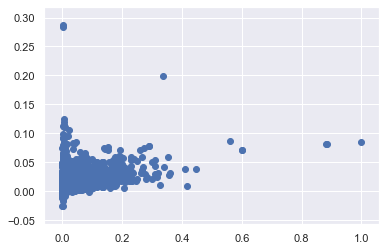

In [45]:
#observed values vs Fitted values
plt.scatter(df_norm_new3.revolbal,m1_pred)


In [47]:

from sklearn.model_selection import train_test_split

In [48]:
df_train, df_test=train_test_split(df_norm_new3, test_size=0.2)
model_train=snf.ols('revolbal~loanamnt+terms+interest+annual_inc+debtincratio+delinq_2yrs+inq6mont+lastdeling+lastrecord+numb_credit+total_credits+latefee+recoveries+collectionfee+collections+lasrmaj_derog+nowdelinq+collecamnt+currentbal',data=df_train).fit()
model_train.summary()
pred_train=model_train.predict(pd.DataFrame(df_train))
resd_train=pred_train-df_norm_new3.revolbal
train_rmse=np.sqrt(np.mean(resd_train*resd_train))

pred_t=model_train.predict(pd.DataFrame(df_test))
resd_test=pred_t-df_norm_new3.revolbal
test_rmse=np.sqrt(np.mean(resd_test*resd_test))
print(train_rmse,test_rmse)

0.006585412268109146 0.008166988176430579


# Applying Neural Network

In [49]:
from keras.models import Sequential

Using TensorFlow backend.


In [51]:
from keras.layers import Dense, Activation,Layer,Lambda
from tensorflow. keras.layers import Flatten, Dropout, Activation, Input, Dense, Lambda
from tensorflow.python.framework import ops
ops.reset_default_graph()
from tensorflow.keras.models import Sequential
from keras.layers import Lambda
from keras import backend as K
from tensorflow.keras import layers
import tensorflow.keras.layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [52]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [53]:
column_names = list(df_norm_new3.columns)
predictors = column_names[1:]
target = column_names[0]


In [54]:
from tensorflow.keras import backend

In [55]:
first_model = prep_model([20,50,1])
first_model.fit(np.array(df_norm_new3[predictors]),np.array(df_norm_new3[target]),epochs=3)
pred_train = first_model.predict(np.array(df_norm_new3[predictors]))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-df_norm_new3[target])**2))

Train on 887379 samples
Epoch 1/3
887379/887379 [==============================] - 69s 78us/sample - loss: 0.0250 - accuracy: 0.0362
Epoch 2/3
887379/887379 [==============================] - 60s 68us/sample - loss: 0.0235 - accuracy: 0.0370
Epoch 3/3
887379/887379 [==============================] - 61s 69us/sample - loss: 0.0233 - accuracy: 0.0371


# Applying XGBoost

In [56]:
df_new=df.iloc[:,[10,0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20]]

In [57]:
X = df_new.iloc[:, 1:]
y = df_new.iloc[:, 0]

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [59]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 20)

In [62]:
xg_reg.fit(X_train,y_train)

[21:42:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
ypred_train = xg_reg.predict(X_train)
mse = mean_squared_error(y_train, ypred_train)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse*(1/2.0)))

MSE: 259881482.95
RMSE: 129940741.48


In [64]:
score = xg_reg.score(X_train, y_train)  
print("Training score: ", score)


Training score:  0.4803702216845728


In [65]:
ypred = xg_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse*(1/2.0)))


MSE: 314707672.00
RMSE: 157353836.00


In [66]:
score = xg_reg.score(X_test, y_test)  
print("Training score: ", score)


Training score:  0.38807250553766065


In [67]:
xg_reg.fit(X,y)

[21:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [68]:
ypred = xg_reg.predict(X)
mse = mean_squared_error(y, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse*(1/2.0)))

MSE: 263826559.60
RMSE: 131913279.80


In [69]:
score = xg_reg.score(X_test, y_test)  
print(" score: ", score)

 score:  0.4842665511204788


#Applying Random forest

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [71]:
#def random_forest_classifier(features, target):
   #clf = RandomForestClassifier()
    #clf.fit(features, target)
   # return clf
clf = RandomForestRegressor(n_estimators = 40,bootstrap=True,verbose=3,max_features="auto",oob_score=True, max_depth=10, random_state = 80)
# Train the model on training data
clf.fit(X, y)
pred=clf.predict(pd.DataFrame(X))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 40


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


building tree 2 of 40


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.3s remaining:    0.0s


building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.7s finished


In [ ]:
X["pred_rev"]=pred
X.to_csv("revo.csv",encoding="UTF-8")

In [72]:

from sklearn import metrics
print(' RMSE', np.sqrt(metrics.mean_squared_error(y, pred)))

 RMSE 16126.145126770909


In [73]:
accuracy = clf.score(X, y)
print(accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


0.48295622836745067


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.9s finished


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=80)

In [75]:
#def random_forest_classifier(features, target):
   #clf = RandomForestClassifier()
    #clf.fi#t(features, target)
   # return clf
clf = RandomForestRegressor(n_estimators = 40,bootstrap=True,verbose=3,max_features="auto",oob_score=True, max_depth=10, random_state = 80)
# Train the model on training data
clf.fit(X_train, y_train)
pred_train=clf.predict(pd.DataFrame(X_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 40


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


building tree 2 of 40


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s


building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.1s finished


In [76]:
from sklearn import metrics
print(' RMSE_Train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))


 RMSE_Train 15751.557222661764


In [77]:
accuracy_train = clf.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.2s finished


In [78]:
print(accuracy_train)

0.4907270321321801


In [79]:
pred_test=clf.predict(pd.DataFrame(X_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.8s finished


In [80]:
from sklearn import metrics
print(' RMSE_Test', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))


 RMSE_Test 18070.909368220506


In [81]:
accuracy_test = clf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.8s finished


In [82]:
print(accuracy_test)

0.39499189891642605


In [83]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [84]:
def r2(clf, X, y):
    return r2_score(y, clf.predict(X))

In [85]:
perm_imp_rfpimp = permutation_importances(clf, X, y, r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

In [86]:
perm_imp_rfpimp

,Importance
Feature,
tot_curr_bal,0.316621
debt_income_ratio,0.242603
annual_inc,0.181023
loan_amnt,0.099471
total_credits,0.033749
numb_credit,0.016015
Rate_of_intrst,0.012010
mths_since_last_major_derog,0.007214
tot_colle_amt,0.002936


In [87]:
import pickle
# Saving model to disk
pickle.dump(clf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1000, 10, 20, 30, 40, 50, 60, 70, 80, 90, 20, 10, 35, 45, 55, 65, 75, 85, 95,45]]))

[8076.41161373]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
